In [312]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multinomial
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

donwload the dataset and put under `data`

## Load user responses

In [313]:
input_dir = os.path.normpath('./data/train_data')
train_data = 'train_task_3_4.csv'
data_path = os.path.join(input_dir, train_data)
train_df = pd.read_csv(data_path)
train_df

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [314]:
QUESTION_KEY = 'QuestionId'
n_questions = len(train_df[QUESTION_KEY].unique())
question_ids = pd.Series(np.arange(n_questions), name=QUESTION_KEY)
question_ids

0        0
1        1
2        2
3        3
4        4
      ... 
943    943
944    944
945    945
946    946
947    947
Name: QuestionId, Length: 948, dtype: int64

## Extract features from user responses

### 1) Selection Entropies

In [315]:
selection_entropies = train_df.groupby(QUESTION_KEY)['AnswerValue'].apply(
    lambda x: multinomial.entropy(1, x.value_counts(normalize=True))
)
selection_entropies

QuestionId
0       1.194456119275689
1      0.8760057656431736
2      1.3316632075619683
3      0.6954225533991737
4      1.3243211426168569
              ...        
943    0.9585435938032012
944    1.3124040297960131
945    1.2609343801953017
946    1.2367325970309815
947      1.08261445702246
Name: AnswerValue, Length: 948, dtype: object

In [316]:
selection_entropies = selection_entropies.values.astype(float)
selection_entropies = pd.Series(selection_entropies, index=question_ids, name='SelectionEntropy')
selection_entropies

QuestionId
0      1.194456
1      0.876006
2      1.331663
3      0.695423
4      1.324321
         ...   
943    0.958544
944    1.312404
945    1.260934
946    1.236733
947    1.082614
Name: SelectionEntropy, Length: 948, dtype: float64

In [317]:
selection_entropies.describe()

count    948.000000
mean       1.139295
std        0.204057
min        0.000000
25%        1.037220
50%        1.198014
75%        1.297631
max        1.386294
Name: SelectionEntropy, dtype: float64

<Axes: xlabel='SelectionEntropy', ylabel='Density'>

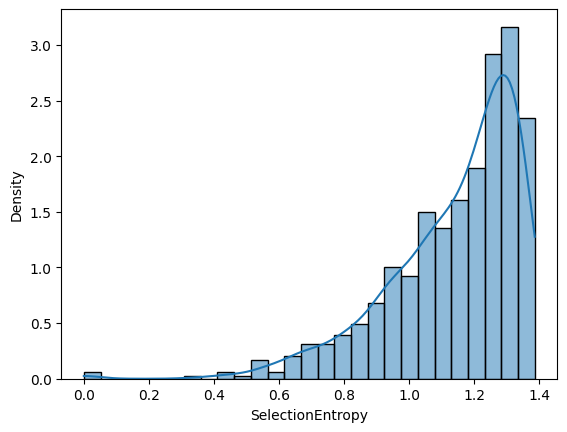

In [318]:
sns.histplot(selection_entropies, kde=True, stat='density')

### 2) Correctness Entropies

In [319]:
correctness_entropies = train_df.groupby(QUESTION_KEY)['IsCorrect'].apply(
    lambda x: multinomial.entropy(1, x.value_counts(normalize=True))
)

In [320]:
correctness_entropies = correctness_entropies.values.astype(float)
correctness_entropies = pd.Series(correctness_entropies, index=question_ids, name='CorrectnessEntropy')
correctness_entropies

QuestionId
0      0.686739
1      0.682908
2      0.666559
3      0.488020
4      0.673579
         ...   
943    0.684269
944    0.410116
945    0.681035
946    0.689856
947    0.665454
Name: CorrectnessEntropy, Length: 948, dtype: float64

In [321]:
correctness_entropies.describe()

count    948.000000
mean       0.641264
std        0.070357
min        0.000000
25%        0.618163
50%        0.666980
75%        0.687197
max        0.693147
Name: CorrectnessEntropy, dtype: float64

<Axes: xlabel='CorrectnessEntropy', ylabel='Density'>

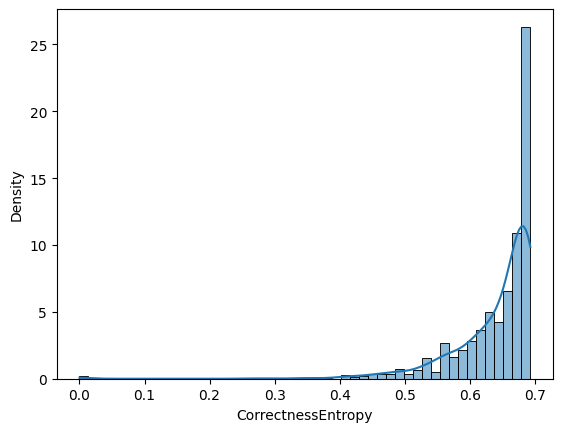

In [322]:
sns.histplot(correctness_entropies, kde=True, stat='density')

### 3) Difficulties

In [323]:
user2score = {
    user_id: correct_rate for user_id, correct_rate \
        in train_df.groupby('UserId')['IsCorrect'].mean().reset_index().values
}
user2score

{1.0: 0.41935483870967744,
 2.0: 0.36666666666666664,
 3.0: 1.0,
 4.0: 0.6814159292035398,
 5.0: 0.6068052930056711,
 6.0: 0.41581632653061223,
 7.0: 0.7833333333333333,
 10.0: 0.48336594911937375,
 11.0: 0.43478260869565216,
 12.0: 0.608433734939759,
 13.0: 0.27586206896551724,
 15.0: 0.6326530612244898,
 16.0: 0.34959349593495936,
 17.0: 0.720703125,
 18.0: 0.7490909090909091,
 20.0: 0.4234104046242775,
 21.0: 0.71875,
 22.0: 0.6372549019607843,
 24.0: 0.4934210526315789,
 25.0: 0.5014084507042254,
 26.0: 0.5646630236794171,
 27.0: 0.2857142857142857,
 28.0: 0.5433526011560693,
 29.0: 0.6016949152542372,
 30.0: 0.7413793103448276,
 31.0: 0.6723549488054608,
 33.0: 0.6600306278713629,
 34.0: 0.38545454545454544,
 35.0: 0.317741935483871,
 36.0: 0.45217391304347826,
 37.0: 0.4930555555555556,
 40.0: 0.2344632768361582,
 42.0: 0.32229965156794427,
 44.0: 0.5596816976127321,
 45.0: 0.5060728744939271,
 47.0: 0.5717255717255717,
 48.0: 0.43661971830985913,
 50.0: 0.6644736842105263,
 51.0

In [324]:
train_df['UserCorrectRate'] = train_df['UserId'].map(user2score)

l_question_ids = [None] * n_questions
l_difficulties = [None] * n_questions
for i, (question_id, gpby_df) in enumerate(train_df.groupby(QUESTION_KEY)):
    mean_diff = (gpby_df['IsCorrect'] - gpby_df['UserCorrectRate']).abs().mean()
    l_question_ids[i] = question_id
    l_difficulties[i] = mean_diff
question_ids = pd.Series(l_question_ids, name=QUESTION_KEY)
difficulties = pd.Series(l_difficulties, index=question_ids, name='Difficulty')

In [325]:
difficulties.describe()

count    948.000000
mean       0.430495
std        0.029131
min        0.314183
25%        0.412016
50%        0.427290
75%        0.445994
max        0.575351
Name: Difficulty, dtype: float64

<Axes: xlabel='Difficulty', ylabel='Density'>

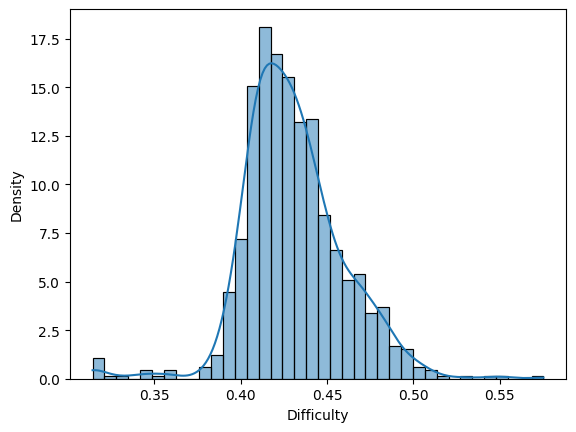

In [326]:
sns.histplot(difficulties, kde=True, stat='density')

## Get ranking to each question

In [327]:
def get_ranking(series, ascending=False):
    return series.rank(method='first', ascending=ascending).astype('int16')

In [328]:
ranking_df = pd.DataFrame()
ranking_df['SelectionEntropy'] = get_ranking(selection_entropies)
ranking_df['CorrectnessEntropy'] = get_ranking(correctness_entropies)
ranking_df['Difficulty'] = get_ranking(difficulties)
df_columns = ranking_df.columns.copy()
ranking_df['Select+Correct'] = get_ranking(
    ranking_df[df_columns[:2]].mean(axis='columns'), ascending=True
)
ranking_df['All'] = get_ranking(
    ranking_df[df_columns[:3]].mean(axis='columns'), ascending=True
)
ranking_df

,SelectionEntropy,CorrectnessEntropy,Difficulty,Select+Correct,All
QuestionId,,,,,
0,484,247,458,391,434
1,844,293,584,672,661
2,124,481,172,230,76
3,908,915,751,919,924
4,150,405,92,160,12
...,...,...,...,...,...
943,780,274,634,636,656
944,188,938,95,669,448
945,331,324,267,296,215


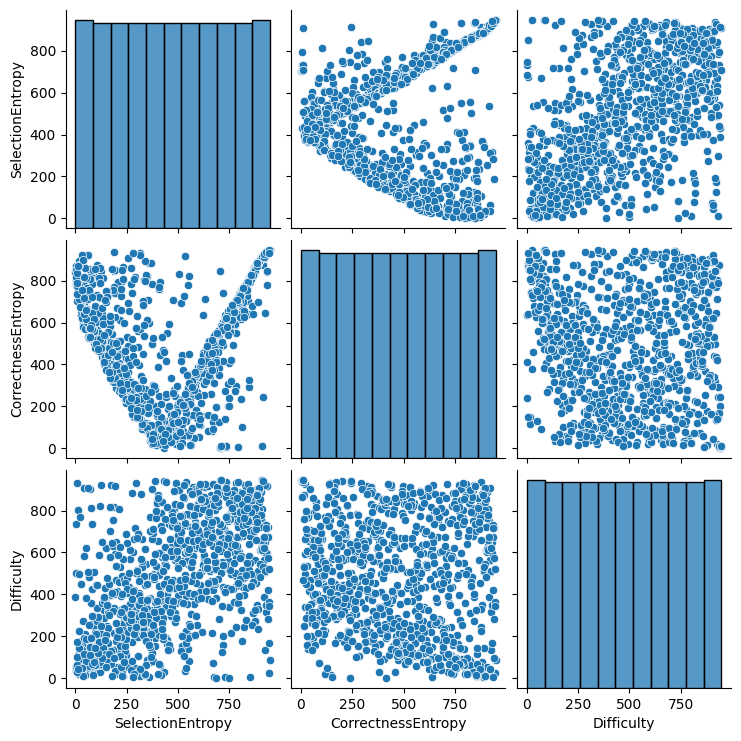

In [329]:
sns.pairplot(ranking_df[['SelectionEntropy', 'CorrectnessEntropy', 'Difficulty']])

In [330]:
from scipy import stats

# Pearson correlation coefficient
print("Between 'SelectionEntropy' and 'CorrectnessEntropy'")
print(stats.pearsonr(ranking_df['SelectionEntropy'], ranking_df['CorrectnessEntropy']), end='\n\n')

print("Between 'SelectionEntropy' and 'Difficulty'")
print(stats.pearsonr(ranking_df['SelectionEntropy'], ranking_df['Difficulty']), end='\n\n')

print("Between 'CorrectnessEntropy' and 'Difficulty'")
print(stats.pearsonr(ranking_df['CorrectnessEntropy'], ranking_df['Difficulty']), end='\n\n')

Between 'SelectionEntropy' and 'CorrectnessEntropy'
PearsonRResult(statistic=0.15646121639402782, pvalue=1.2927390477980465e-06)

Between 'SelectionEntropy' and 'Difficulty'
PearsonRResult(statistic=0.5567156787424894, pvalue=2.90397069378883e-78)

Between 'CorrectnessEntropy' and 'Difficulty'
PearsonRResult(statistic=-0.10046247097276066, pvalue=0.001955181734513189)



## Save the ranking to csv file

In [331]:
submission_template_dir = os.path.normpath('./submission')
submission_template_file = 'template.csv'
output_dir = os.path.normpath('./submission')
output_file = os.path.normpath('20182464.csv')
if not os.path.isdir(os.path.normpath(output_dir)):
    os.makedirs(os.path.normpath(output_dir))

In [332]:
def write_file(ranking):
    submission_file_path = os.path.join(submission_template_dir, submission_template_file)
    submission_df = pd.read_csv(submission_file_path)
    submission_df['ranking'] = ranking
    output_path = os.path.join(output_dir, output_file)
    submission_df.to_csv(output_path, index=False)

In [333]:
write_file(ranking_df['All'])

## Using validation set to evaluate the ranking

In [334]:
template = pd.read_csv('submission/20182464.csv')
len(template)

948

In [335]:
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


In [336]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    # print(submission_preference)

    return submission_preference

In [337]:
def score(result, truth):
    count = [0] * 5
    for idx in range(len(result)):
        if truth['T1_ALR'][idx] == result[idx]:
            count[0] += 1
        if truth['T2_CL'][idx] == result[idx]:
            count[1] += 1
        if truth['T3_GF'][idx] == result[idx]:
            count[2] += 1
        if truth['T4_MQ'][idx] == result[idx]:
            count[3] += 1
        if truth['T5_NS'][idx] == result[idx]:
            count[4] += 1
    
    score_result = list(map(lambda x: x / len(result), count))
    maximum = max(score_result)
    return [score_result.index(maximum), maximum]

In [338]:
result = evaluate(eval_validation, template)
print("Valid Accuracy :", score(result, eval_validation)[1])

Valid Accuracy : 0.84


## Evaluate
code from https://competitions.codalab.org/forums/22145/4564/

In [339]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [340]:
eval_test.fillna(1, inplace=True)

In [341]:
result = evaluate(eval_test, template)
print("Test Accuracy :", score(result, eval_test)[1])

Test Accuracy : 0.8


In [342]:
pred_result = eval_test[eval_test.columns[3 + score(result, eval_test)[0]]]

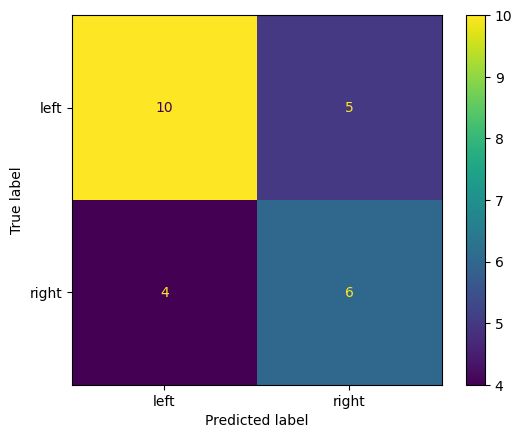

In [343]:
cm = confusion_matrix(result, pred_result)

display_labels = ['left', 'right']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()
plt.show()